<a href="https://colab.research.google.com/github/farfaness/Machine_learning/blob/master/Classifier_models_comparaison_Grid_search_ACP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from google.colab import drive
drive.mount('/content/drive')

In [0]:
cd /content/drive/My Drive/Datasets

/content/drive/My Drive/Datasets


In [0]:
# Librairies needed
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [0]:
# Load the dataset
data = pd.read_csv("/content/drive/My Drive/Datasets/SPAM.csv")

# Descriptive statistics

In [0]:
# Visualize data
data.head(5)

,spam,testid,make,address,all,3d,our,over,remove,internet,order,mail,receive,will,people,report,addresses,free,business,email,you,credit,your,font,000,money,hp,hpl,george,650,lab,labs,telnet,857,data,415,85,technology,1999,parts,pm,direct,cs,meeting,original,project,re,edu,table,conference,ch;,ch(,ch[,ch!,ch$,ch#,crl.ave,crl.long,crl.tot
0,True,True,0.00,0.64,0.64,0.0,0.32,0.00,0.00,0.00,0.00,0.00,0.00,0.64,0.00,0.00,0.00,0.32,0.00,1.29,1.93,0.00,0.96,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.00,0.000,0.0,0.778,0.000,0.000,3.756,61,278
1,True,False,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,0.21,0.79,0.65,0.21,0.14,0.14,0.07,0.28,3.47,0.00,1.59,0.0,0.43,0.43,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.07,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.00,0.132,0.0,0.372,0.180,0.048,5.114,101,1028
2,True,True,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,0.38,0.45,0.12,0.00,1.75,0.06,0.06,1.03,1.36,0.32,0.51,0.0,1.16,0.06,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.06,0.0,0.0,0.12,0.0,0.06,0.06,0.0,0.0,0.01,0.143,0.0,0.276,0.184,0.010,9.821,485,2259
3,True,False,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,0.31,0.31,0.31,0.00,0.00,0.31,0.00,0.00,3.18,0.00,0.31,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.00,0.137,0.0,0.137,0.000,0.000,3.537,40,191
4,True,False,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,0.31,0.31,0.31,0.00,0.00,0.31,0.00,0.00,3.18,0.00,0.31,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.00,0.135,0.0,0.135,0.000,0.000,3.537,40,191


In [0]:
# Data length
print("Taille du dataset: {}" .format(len(data)))

Taille du dataset: 4601


In [0]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4601 entries, 0 to 4600
Data columns (total 59 columns):
spam          4601 non-null bool
testid        4601 non-null bool
make          4601 non-null float64
address       4601 non-null float64
all           4601 non-null float64
3d            4601 non-null float64
our           4601 non-null float64
over          4601 non-null float64
remove        4601 non-null float64
internet      4601 non-null float64
order         4601 non-null float64
mail          4601 non-null float64
receive       4601 non-null float64
will          4601 non-null float64
people        4601 non-null float64
report        4601 non-null float64
addresses     4601 non-null float64
free          4601 non-null float64
business      4601 non-null float64
email         4601 non-null float64
you           4601 non-null float64
credit        4601 non-null float64
your          4601 non-null float64
font          4601 non-null float64
000           4601 non-null float64

In [0]:
# Original dataset train-test partition
data['testid'].value_counts()

False    3065
True     1536
Name: testid, dtype: int64

In [0]:
# Target variable
data['spam'].value_counts()

False    2788
True     1813
Name: spam, dtype: int64

In [0]:
# Check Nan
print(data.isna().sum())

spam          0
testid        0
make          0
address       0
all           0
3d            0
our           0
over          0
remove        0
internet      0
order         0
mail          0
receive       0
will          0
people        0
report        0
addresses     0
free          0
business      0
email         0
you           0
credit        0
your          0
font          0
000           0
money         0
hp            0
hpl           0
george        0
650           0
lab           0
labs          0
telnet        0
857           0
data          0
415           0
85            0
technology    0
1999          0
parts         0
pm            0
direct        0
cs            0
meeting       0
original      0
project       0
re            0
edu           0
table         0
conference    0
ch;           0
ch(           0
ch[           0
ch!           0
ch$           0
ch#           0
crl.ave       0
crl.long      0
crl.tot       0
dtype: int64


# Feature engineering

In [0]:
#Removal of the column testid (i.e. original train-test partition of the dataset)
data.drop(columns = 'testid', inplace= True)

In [0]:
# Create X and y
liste_col = data.columns.tolist()
X = data[liste_col[1::]]
y = data[liste_col[0]]

In [0]:
# Sanity check : visualize first row of X and y
print(X.loc[[0]])
print(y.loc[[0]])

   make  address   all   3d   our  ...  ch$  ch#  crl.ave  crl.long  crl.tot
0   0.0     0.64  0.64  0.0  0.32  ...  0.0  0.0    3.756        61      278

[1 rows x 57 columns]
0    True
Name: spam, dtype: bool


# Hyperparameters Randomized Search CV for a pipeline defined as : 

1.   Standard scaler
2.   PCA
3.   Logistic Regression







In [0]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn import decomposition
from sklearn.pipeline import Pipeline
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint as sp_randint

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


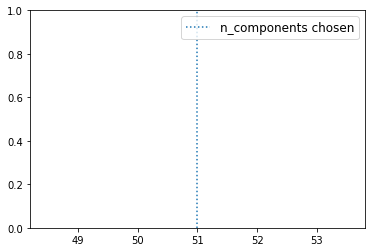

In [0]:
# Parameters for the Grid search of ACP and Logistic regression
dual= [True, False]
#max_iter=[100,110,120,130,140, 150, 160, 170, 180, 190, 200, 210, 220, 230, 240, 250, 1000, 2000, 5000, 10000]
#C = np.logspace(-5, 5, 100) 
#n_components = list(range(1, X.shape[1] +1)) 

max_iter = sp_randint(100, 10000)
C = np.logspace(-5, 5, 100)
n_components = sp_randint(1, X.shape[1])

# Dicionnary of parameters for the grid search
param_dist = dict(pca__n_components=n_components, logistic__dual= dual, logistic__max_iter=max_iter, logistic__C=C)

# Pipeline definition
scaling = StandardScaler()
logistic = LogisticRegression() #l2 penalty, ibfgs solver
pca = decomposition.PCA()
pipe_ACP_logic = Pipeline(steps=[('scaling', scaling), ('pca', pca), ('logistic', logistic)])

# Grid Search CV
randomsearch= RandomizedSearchCV(estimator=pipe_ACP_logic, param_distributions=param_dist, cv = 10, n_jobs=-1, scoring = "f1", n_iter = 100)
randomsearch_result = randomsearch.fit(X, y)

optimised_logistic_reg = randomsearch_result.best_estimator_

plt.axvline(randomsearch_result.best_estimator_.named_steps['pca'].n_components,
            linestyle=':', label='n_components chosen')
plt.legend(prop=dict(size=12))
plt.show()

In [0]:
# Summarize results
print("Best: %f using %s" % (randomsearch_result.best_score_, randomsearch_result.best_params_))

Best: 0.895458 using {'logistic__C': 11.497569953977356, 'logistic__dual': False, 'logistic__max_iter': 1952, 'pca__n_components': 51}


# Classification : Models comparison with statified K-folds as train/test split

In [0]:
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score, log_loss, f1_score
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, NuSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis 
from time import perf_counter

def warn(*args, **kwargs): pass
import warnings
warnings.warn = warn

In [0]:
# Classifiers comparison with Stratified KFold as train-test split

classifiers = [
    KNeighborsClassifier(3),
    SVC(kernel="rbf", C=0.025, probability=True),
    NuSVC(probability=True),
    DecisionTreeClassifier(),
    RandomForestClassifier(),
    AdaBoostClassifier(),
    GradientBoostingClassifier(),
    GaussianNB(),
    LinearDiscriminantAnalysis(),
    QuadraticDiscriminantAnalysis(),
    optimised_logistic_reg]

# Logging to strore the metrics of each classifier for each k fold
log_cols=["Classifier", "Duration_seconds", "Accuracy_test", "Log_Loss_test", "F1_Score_test", "Accuracy_train", "Log_Loss_train", "F1_Score_train"]
log = pd.DataFrame(columns=log_cols)


sss = StratifiedKFold(n_splits=10, shuffle=True, random_state = 42)

for train_index, test_index in sss.split(X, y):
  X_train, X_test = X.loc[train_index], X.loc[test_index]
  y_train, y_test = y.loc[train_index], y.loc[test_index]
  
  for clf in classifiers:
    start = perf_counter ()
    clf.fit(X_train, y_train)
    duration = perf_counter () - start
    name = clf.__class__.__name__
    
    #Accuracy_test
    train_predictions = clf.predict(X_test)
    acc_test = accuracy_score(y_test, train_predictions)
    
    #F1 Score test
    F1_test = f1_score(y_test, train_predictions, labels=None, pos_label=1, average='binary', sample_weight=None)
    
    #Log_loss test
    train_predictions = clf.predict_proba(X_test)
    ll_test = log_loss(y_test, train_predictions)
    
    #Accuracy_train
    train_predictions = clf.predict(X_train)
    acc_train = accuracy_score(y_train, train_predictions)
    
    #F1 Score train
    F1_train = f1_score(y_train, train_predictions, labels=None, pos_label=1, average='binary', sample_weight=None)
    
    #Log_loss train
    train_predictions = clf.predict_proba(X_train)
    ll_train = log_loss(y_train, train_predictions)
    
    #Create dataframe log to store the results
    log_entry = pd.DataFrame([[name, duration, acc_test*100, ll_test, F1_test, acc_train*100, ll_train, F1_train]], columns=log_cols)
    log = log.append(log_entry)

/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [0]:
print(log.shape)
log.head() 

(110, 8)


,Classifier,Duration_seconds,Accuracy_test,Log_Loss_test,F1_Score_test,Accuracy_train,Log_Loss_train,F1_Score_train
0,KNeighborsClassifier,0.013165,81.344902,2.550384,0.761111,90.048309,0.193851,0.871811
0,SVC,9.060091,60.520607,0.475908,0.000000,60.603865,0.443000,0.000000
0,NuSVC,9.251573,85.249458,0.347762,0.814208,94.299517,0.170318,0.925222
0,DecisionTreeClassifier,0.066854,93.275488,2.322564,0.915068,99.951691,0.000670,0.999387
0,RandomForestClassifier,0.064285,94.577007,0.425159,0.929178,99.637681,0.042387,0.995386


In [0]:
#Compute the mean accross the 10 stratified k-folds
log_mean = log.groupby(['Classifier']).mean()
log_mean.head(15)

,Duration_seconds,Accuracy_test,Log_Loss_test,F1_Score_test,Accuracy_train,Log_Loss_train,F1_Score_train
Classifier,,,,,,,
AdaBoostClassifier,0.372127,93.544077,0.615814,0.917669,94.928637,0.614436,0.935309
DecisionTreeClassifier,0.078537,91.370394,2.958654,0.891793,99.942042,0.000803,0.999264
GaussianNB,0.005115,82.156716,4.583188,0.808973,82.233328,4.489500,0.809681
GradientBoostingClassifier,0.811902,94.609438,0.151526,0.930514,96.358273,0.115823,0.953413
KNeighborsClassifier,0.013275,80.807326,2.404674,0.754355,90.098750,0.192231,0.873410
LinearDiscriminantAnalysis,0.041080,88.719396,0.295781,0.845661,88.954086,0.281467,0.849168
NuSVC,9.237244,83.524770,0.361732,0.794986,94.515674,0.166978,0.928688
Pipeline,0.136951,92.740248,0.238230,0.906064,93.042580,0.203158,0.910038
QuadraticDiscriminantAnalysis,0.021290,82.549249,4.512916,0.812117,82.651005,4.427614,0.813191


In [0]:
#Print the results for each classifier
i= 0
while i < len(log_mean) :
  name = log_mean.iloc[i].name
  print("="*30)
  print(name)
    
  print('****Results****')
  
  duration = log_mean.iloc[i].Duration_seconds
  print("Duration: {} seconds".format(duration))
  
  acc = log_mean.iloc[i].Accuracy_test
  print("Accuracy test: {} %".format(round(acc, 2)))
  
  acc = log_mean.iloc[i].Accuracy_train
  print("Accuracy train: {} %".format(round(acc, 2)))
  
  ll = log_mean.iloc[i]['Log_Loss_test']
  print("Log Loss test: {}".format(round(ll, 2)))
  
  ll = log_mean.iloc[i]['Log_Loss_train']
  print("Log Loss train: {}".format(round(ll, 2)))
  
  F1 = log_mean.iloc[i].F1_Score_test
  print("F1 binary score test: {}".format(round(F1, 2)))
  
  F1 = log_mean.iloc[i].F1_Score_train
  print("F1 binary score train: {}".format(round(F1, 2)))
  i+=1
     
print("="*30)

AdaBoostClassifier
****Results****
Duration: 0.3721270920999814 seconds
Accuracy test: 93.54 %
Accuracy train: 94.93 %
Log Loss test: 0.62
Log Loss train: 0.61
F1 binary score test: 0.92
F1 binary score train: 0.94
DecisionTreeClassifier
****Results****
Duration: 0.07853748399993492 seconds
Accuracy test: 91.37 %
Accuracy train: 99.94 %
Log Loss test: 2.96
Log Loss train: 0.0
F1 binary score test: 0.89
F1 binary score train: 1.0
GaussianNB
****Results****
Duration: 0.005115016300032948 seconds
Accuracy test: 82.16 %
Accuracy train: 82.23 %
Log Loss test: 4.58
Log Loss train: 4.49
F1 binary score test: 0.81
F1 binary score train: 0.81
GradientBoostingClassifier
****Results****
Duration: 0.8119019331000346 seconds
Accuracy test: 94.61 %
Accuracy train: 96.36 %
Log Loss test: 0.15
Log Loss train: 0.12
F1 binary score test: 0.93
F1 binary score train: 0.95
KNeighborsClassifier
****Results****
Duration: 0.013274777600008747 seconds
Accuracy test: 80.81 %
Accuracy train: 90.1 %
Log Loss test

In [0]:
print(log_mean.index)

Index(['AdaBoostClassifier', 'DecisionTreeClassifier', 'GaussianNB',
       'GradientBoostingClassifier', 'KNeighborsClassifier',
       'LinearDiscriminantAnalysis', 'NuSVC', 'Pipeline',
       'QuadraticDiscriminantAnalysis', 'RandomForestClassifier', 'SVC'],
      dtype='object', name='Classifier')


# Visual illustration of models comparison

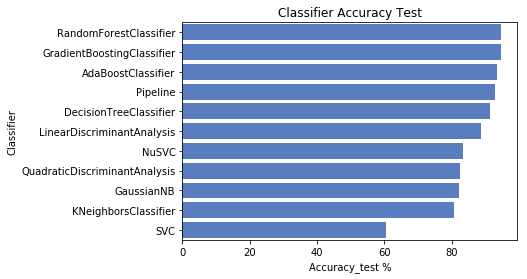

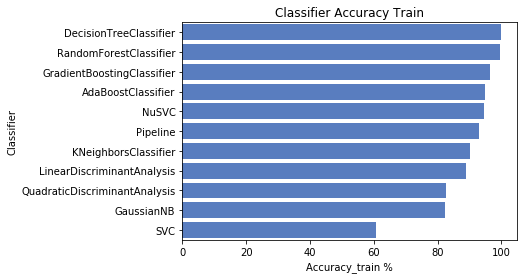

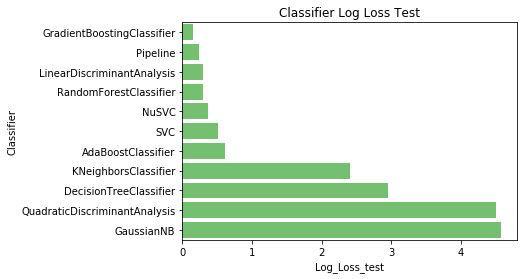

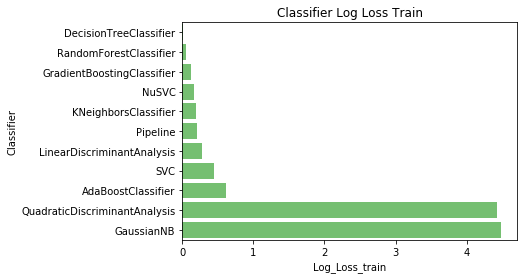

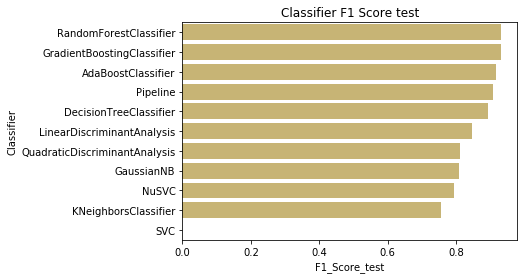

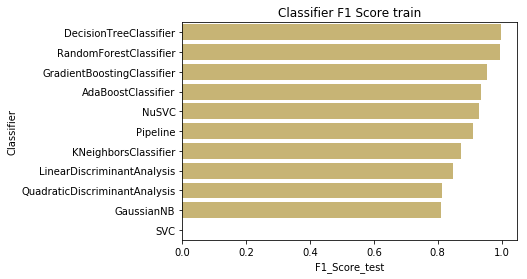

In [0]:
import seaborn as sns

#Plot accuracy Test
sns.set_color_codes("muted")
order = log_mean.sort_values('Accuracy_test', ascending = False).index
sns.barplot(x='Accuracy_test', y=log_mean.index, data=log_mean, color="b", order = order)
plt.xlabel('Accuracy_test %')
plt.title('Classifier Accuracy Test')
plt.show()

#Plot accuracy train
sns.set_color_codes("muted")
order = log_mean.sort_values('Accuracy_train', ascending = False).index
sns.barplot(x='Accuracy_train', y=log_mean.index, data=log_mean, color="b", order = order)
plt.xlabel('Accuracy_train %')
plt.title('Classifier Accuracy Train')
plt.show()

#Plot Log Loss test
sns.set_color_codes("muted")
order = log_mean.sort_values('Log_Loss_test', ascending = True).index
sns.barplot(x='Log_Loss_test', y=log_mean.index, data=log_mean, color="g", order = order)
plt.xlabel('Log_Loss_test')
plt.title('Classifier Log Loss Test')
plt.show()

#Plot Log Loss train
sns.set_color_codes("muted")
order = log_mean.sort_values('Log_Loss_train', ascending = True).index
sns.barplot(x='Log_Loss_train', y=log_mean.index, data=log_mean, color="g", order = order)
plt.xlabel('Log_Loss_train')
plt.title('Classifier Log Loss Train')
plt.show()

#Plot F1_scores test
sns.set_color_codes("muted")
order = log_mean.sort_values('F1_Score_test', ascending = False).index
sns.barplot(x='F1_Score_test', y=log_mean.index, data=log_mean, color="y", order = order)
plt.xlabel('F1_Score_test')
plt.title('Classifier F1 Score test')
plt.show()

#Plot F1_scores train
sns.set_color_codes("muted")
order = log_mean.sort_values('F1_Score_train', ascending = False).index
sns.barplot(x='F1_Score_train', y=log_mean.index, data=log_mean, color="y", order = order)
plt.xlabel('F1_Score_test')
plt.title('Classifier F1 Score train')
plt.show()

# What is the best model when we add some noise?

In [0]:
n_samples, n_features = X.shape

In [0]:
# Add a lot of features that are pure noise
random_state = np.random.RandomState(0)
X_noise = np.c_[X, random_state.randn(n_samples, 200 * n_features)]
print(X.shape, X_noise.shape)

(4601, 57) (4601, 11457)


In [0]:
#Add noise to 50% of existing features
from random import sample 
rng = np.random.RandomState(2)

# Add noise to 50% of the sample
list_index_to_perturb = sample(X.index.tolist(),int(len(X)/2))
X_perturbated = X.iloc[list_index_to_perturb]
X_perturbated = X_perturbated + 10 * rng.uniform(size=X_perturbated.shape)

new_X = X.drop(list_index_to_perturb)

# Concatenate the noisy sample and the 50% untouched from the original sample
X_noise_bis = pd.concat([new_X, X_perturbated], verify_integrity=True)
print(X.shape, new_X.shape, X_perturbated.shape, X_noise_bis.shape)

(4601, 57) (2301, 57) (2300, 57) (4601, 57)


In [0]:
# Logging to strore the metrics of each classifier for each k fold
log_cols=["Classifier", "Duration_seconds", "Accuracy_test", "Log_Loss_test", "F1_Score_test", "Accuracy_train", "Log_Loss_train", "F1_Score_train"]
log_noise = pd.DataFrame(columns=log_cols)


#data = data.reset_index()

sss = StratifiedKFold(n_splits=10, shuffle=True, random_state = 42)

for train_index, test_index in sss.split(X_noise_bis, y):
  X_train, X_test = X_noise_bis.loc[train_index], X_noise_bis.loc[test_index]
  y_train, y_test = y.loc[train_index], y.loc[test_index]
  
  for clf in classifiers:
    start = perf_counter ()
    clf.fit(X_train, y_train)
    duration = perf_counter () - start
    name = clf.__class__.__name__
    
    #Accuracy_test
    train_predictions = clf.predict(X_test)
    acc_test = accuracy_score(y_test, train_predictions)
    
    #F1 Score test
    F1_test = f1_score(y_test, train_predictions, labels=None, pos_label=1, average='binary', sample_weight=None)
    
    #Log_loss test
    train_predictions = clf.predict_proba(X_test)
    ll_test = log_loss(y_test, train_predictions)
    
    #Accuracy_train
    train_predictions = clf.predict(X_train)
    acc_train = accuracy_score(y_train, train_predictions)
    
    #F1 Score train
    F1_train = f1_score(y_train, train_predictions, labels=None, pos_label=1, average='binary', sample_weight=None)
    
    #Log_loss train
    train_predictions = clf.predict_proba(X_train)
    ll_train = log_loss(y_train, train_predictions)
    
    #Create dataframe log to store the results
    log_entry = pd.DataFrame([[name, duration, acc_test*100, ll_test, F1_test, acc_train*100, ll_train, F1_train]], columns=log_cols)
    log_noise = log_noise.append(log_entry)

In [0]:
#Compute the mean accross the 10 stratified k-folds
log_mean_noise = log_noise.groupby(['Classifier']).mean()
log_mean_noise.head(15)

,Duration_seconds,Accuracy_test,Log_Loss_test,F1_Score_test,Accuracy_train,Log_Loss_train,F1_Score_train
Classifier,,,,,,,
AdaBoostClassifier,1.107795,84.372697,0.659555,0.797161,86.580216,0.657870,0.825778
DecisionTreeClassifier,0.192073,79.765500,6.974065,0.743225,99.961361,0.000536,0.999509
GaussianNB,0.004474,67.312824,1.581240,0.343935,67.376655,1.558441,0.345971
GradientBoostingClassifier,1.462645,86.002613,0.327815,0.813076,89.982854,0.268002,0.866673
KNeighborsClassifier,0.012069,76.243326,2.947143,0.693875,87.514757,0.251855,0.839686
LinearDiscriminantAnalysis,0.039683,73.223755,0.545141,0.604448,74.404093,0.531227,0.621576
NuSVC,11.455709,69.766657,0.542061,0.441673,98.232264,0.104876,0.977287
Pipeline,0.070573,75.593090,0.501404,0.651099,76.604117,0.488849,0.664738
QuadraticDiscriminantAnalysis,0.020515,68.897990,1.767509,0.414774,71.426521,1.198468,0.476571


In [0]:
#Print the results for each classifier
i= 0
while i < len(log_mean) :
  name = log_noise.iloc[i].Classifier
  print("="*30)
  print(name)
    
  print('****Results****')
  
  duration = log_mean_noise.iloc[i].Duration_seconds
  print("Duration: {} seconds".format(duration))
  
  acc = log_mean_noise.iloc[i].Accuracy_test
  print("Accuracy test: {} %".format(round(acc, 2)))
  
  acc = log_mean_noise.iloc[i].Accuracy_train
  print("Accuracy train: {} %".format(round(acc, 2)))
  
  ll = log_mean_noise.iloc[i]['Log_Loss_test']
  print("Log Loss test: {}".format(round(ll, 2)))
  
  ll = log_mean_noise.iloc[i]['Log_Loss_train']
  print("Log Loss train: {}".format(round(ll, 2)))
  
  F1 = log_mean_noise.iloc[i].F1_Score_test
  print("F1 binary score test: {}".format(round(F1, 2)))
  
  F1 = log_mean_noise.iloc[i].F1_Score_train
  print("F1 binary score train: {}".format(round(F1, 2)))
  i+=1
     
print("="*30)

KNeighborsClassifier
****Results****
Duration: 1.1077950148999662 seconds
Accuracy test: 84.37 %
Accuracy train: 86.58 %
Log Loss test: 0.66
Log Loss train: 0.66
F1 binary score test: 0.8
F1 binary score train: 0.83
SVC
****Results****
Duration: 0.1920732353999483 seconds
Accuracy test: 79.77 %
Accuracy train: 99.96 %
Log Loss test: 6.97
Log Loss train: 0.0
F1 binary score test: 0.74
F1 binary score train: 1.0
NuSVC
****Results****
Duration: 0.004473974100073974 seconds
Accuracy test: 67.31 %
Accuracy train: 67.38 %
Log Loss test: 1.58
Log Loss train: 1.56
F1 binary score test: 0.34
F1 binary score train: 0.35
DecisionTreeClassifier
****Results****
Duration: 1.462645238100049 seconds
Accuracy test: 86.0 %
Accuracy train: 89.98 %
Log Loss test: 0.33
Log Loss train: 0.27
F1 binary score test: 0.81
F1 binary score train: 0.87
RandomForestClassifier
****Results****
Duration: 0.01206890969988308 seconds
Accuracy test: 76.24 %
Accuracy train: 87.51 %
Log Loss test: 2.95
Log Loss train: 0.25


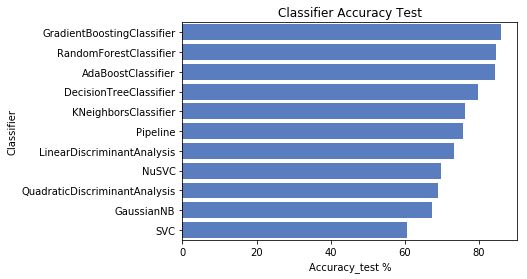

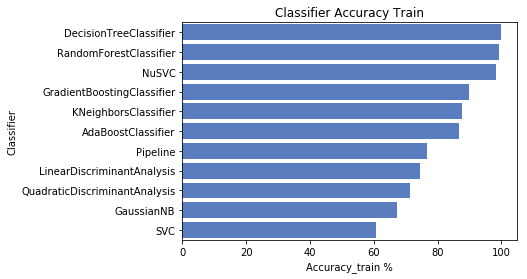

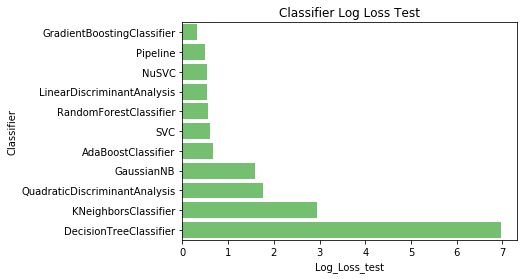

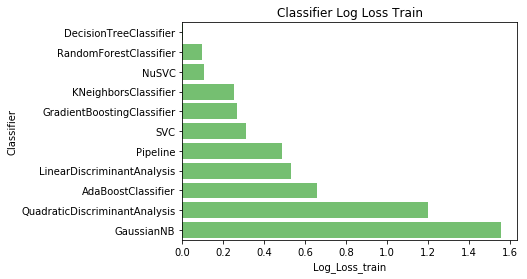

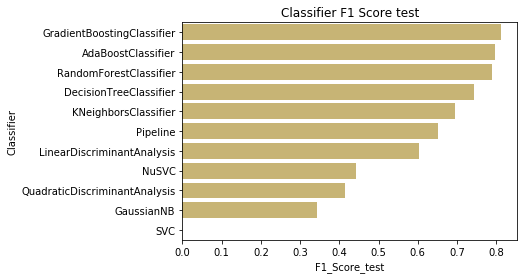

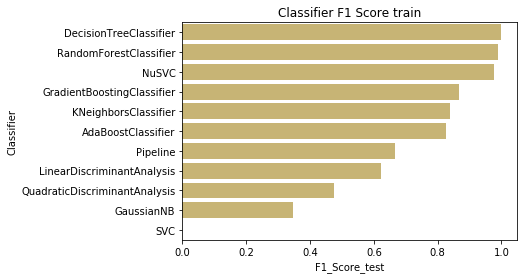

In [0]:
import seaborn as sns

#Plot accuracy Test
sns.set_color_codes("muted")
order = log_mean_noise.sort_values('Accuracy_test', ascending = False).index
sns.barplot(x='Accuracy_test', y=log_mean_noise.index, data=log_mean_noise, color="b", order = order)
plt.xlabel('Accuracy_test %')
plt.title('Classifier Accuracy Test')
plt.show()

#Plot accuracy train
sns.set_color_codes("muted")
order = log_mean_noise.sort_values('Accuracy_train', ascending = False).index
sns.barplot(x='Accuracy_train', y=log_mean_noise.index, data=log_mean_noise, color="b", order = order)
plt.xlabel('Accuracy_train %')
plt.title('Classifier Accuracy Train')
plt.show()

#Plot Log Loss test
sns.set_color_codes("muted")
order = log_mean_noise.sort_values('Log_Loss_test', ascending = True).index
sns.barplot(x='Log_Loss_test', y=log_mean_noise.index, data=log_mean_noise, color="g", order = order)
plt.xlabel('Log_Loss_test')
plt.title('Classifier Log Loss Test')
plt.show()

#Plot Log Loss train
sns.set_color_codes("muted")
order = log_mean_noise.sort_values('Log_Loss_train', ascending = True).index
sns.barplot(x='Log_Loss_train', y=log_mean_noise.index, data=log_mean_noise, color="g", order = order)
plt.xlabel('Log_Loss_train')
plt.title('Classifier Log Loss Train')
plt.show()

#Plot F1_scores test
sns.set_color_codes("muted")
order = log_mean_noise.sort_values('F1_Score_test', ascending = False).index
sns.barplot(x='F1_Score_test', y=log_mean_noise.index, data=log_mean_noise, color="y", order = order)
plt.xlabel('F1_Score_test')
plt.title('Classifier F1 Score test')
plt.show()

#Plot F1_scores train
sns.set_color_codes("muted")
order = log_mean_noise.sort_values('F1_Score_train', ascending = False).index
sns.barplot(x='F1_Score_train', y=log_mean_noise.index, data=log_mean_noise, color="y", order = order)
plt.xlabel('F1_Score_test')
plt.title('Classifier F1 Score train')
plt.show()